<a href="https://colab.research.google.com/github/Madeira-International-Workshop-in-ML/Machine-Learning-with-sklearn/blob/main/Worskshop_machine_learning_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Programming Exercise**

This Exercise will provide a gist of various machine learning methods. It will follow the same order as in slides.

1. Supervised Learning Methods (Decision Tree, Random Forest, k-Nearest Neighbour, and Support Vector Machines, Artificial Neural Networks).

2. Semi Supervised Methods (Support Vector Machines).

3. Unsupervised Methods (k-means clustering).

4. Regression

**Importing Libraries**
following  libraries **Matplotlib.pyplot**, **sklearn**, **seaborn** and **numpy** will be used for this activity.

In [2]:
from sklearn.inspection import DecisionBoundaryDisplay # for plotting decision boundaries of models
import matplotlib.pyplot as plt # for plotting figures
import numpy as np  # for array operations
from sklearn.preprocessing import label_binarize  # one hot encoding
from sklearn.metrics import roc_curve, auc  # ROC curves and AUC values
from sklearn.metrics import confusion_matrix #Confusion Matrix
import seaborn as sns  # to create heatmap for confusion matrix for better representation
from sklearn.metrics import accuracy_score, precision_score, recall_score  # performance metric for classification

**A customized Functions**

First let's create a customized function, which allows you to visualize the **decision boundary**, **ROC curve**, and **performance metrics**. For doing so, we will only use two features, and labels instead of all features.   

In [ ]:
# few parameters for plotting
plot_colors="ryb" # Red, yellow, blue

def plot_decision_boundary(model, X, y, ax, xlabel, ylabel, n_classes, labels, plot_colors):
  DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=xlabel,
        ylabel=ylabel,
    )
  # Plot the training points
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=labels[i],edgecolor="black",s=15)


############################ Plot ROC curve############################################
def plot_roc(Y_test, Y_pred, n_c):
  #convert the labels to one-hot-encoding
  y_test_bin = label_binarize(Y_test, classes=[0, 1, 2])
  y_pred_bin = label_binarize(Y_pred, classes=[0, 1, 2])

  #define the number of classes
  n_classes = n_c

  #initialize an empty dictionary to store ROC curves and AUC values for each class, and then fill it in a loop
  roc_curves = {}
  auc_values = {}
  for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_curves[i] = (fpr, tpr)
    auc_values[i] = auc(fpr, tpr)

  #plot ROC curves for each class
  plt.figure(figsize=(6, 6))
  colors = ['blue', 'red', 'green']
  for i in range(n_classes):
    fpr, tpr = roc_curves[i]
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {auc_values[i]:.2f})')
  #plot the random guess line
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.legend(loc='lower right')
  plt.show()

  #print AUC values for each class

  for i in range(n_classes):
    print(f'Class {i} AUC: {auc_values[i]:.2f}')


#######################################Performance Metrics###################

def perf_metric(Y_test, Y_pred, Method):
  # Confusion Matrix
  cf_matrix = confusion_matrix(Y_test, model.predict(X_test))
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

  #Accuracy
  acc= accuracy_score(Y_pred, Y_test)
  prec= precision_score(Y_pred, Y_test, average="macro")
  reca=recall_score(Y_pred, Y_test, average="macro")
  print(r"The accuarcy, precision, and recall by {} Method is  :{},{}, and {}".format(Method, acc, prec, reca))


**Importing Data, and Preprocessing (Feature scaling)**
We will import iris dataset, and use its only two features for classification to examine the performanc of all machine learning methods by various ways: Plotting decision boundary, confusion matrix, accuracy, precision, and recall curves.

In [4]:
# load dataset, and split data for classification
from sklearn.datasets import load_iris  # use only 2 features (1:3)
from sklearn.model_selection import train_test_split # Splitting data into training, and testing dataset
from sklearn.preprocessing import StandardScaler  # feature scaling/Normalization

# loading data and selecting features
iris=load_iris()
X = iris.data[:, 1:3]
y = iris.target

# Data Normalization/Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Data Splitting
pair=[1,3] # required for plotting the decision boundary
X_train, X_test, Y_train, Y_test=train_test_split(X,y, test_size=0.3)

**Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # importing decision tree implementations from scikit-learn library
from sklearn import tree   # for plotting the tree (only applicable for decision trees, and Random Forest)

#Instantiating the model
model = DecisionTreeClassifier()

# Training the model
model.fit(X_train, Y_train)

# Testing the model
Y_pred= model.predict(X_test)

[Text(0.5357142857142857, 0.9375, 'sepal width (cm) <= -0.743\ngini = 0.664\nsamples = 105\nvalue = [33, 33, 39]'),
 Text(0.4642857142857143, 0.8125, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.6071428571428571, 0.8125, 'sepal width (cm) <= 0.678\ngini = 0.497\nsamples = 72\nvalue = [0, 33, 39]'),
 Text(0.35714285714285715, 0.6875, 'sepal width (cm) <= 0.564\ngini = 0.198\nsamples = 36\nvalue = [0, 32, 4]'),
 Text(0.21428571428571427, 0.5625, 'sepal length (cm) <= -1.168\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]'),
 Text(0.14285714285714285, 0.4375, 'sepal length (cm) <= -1.398\ngini = 0.245\nsamples = 7\nvalue = [0, 6, 1]'),
 Text(0.07142857142857142, 0.3125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.21428571428571427, 0.3125, 'sepal width (cm) <= -0.005\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.14285714285714285, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2857142857142857, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0

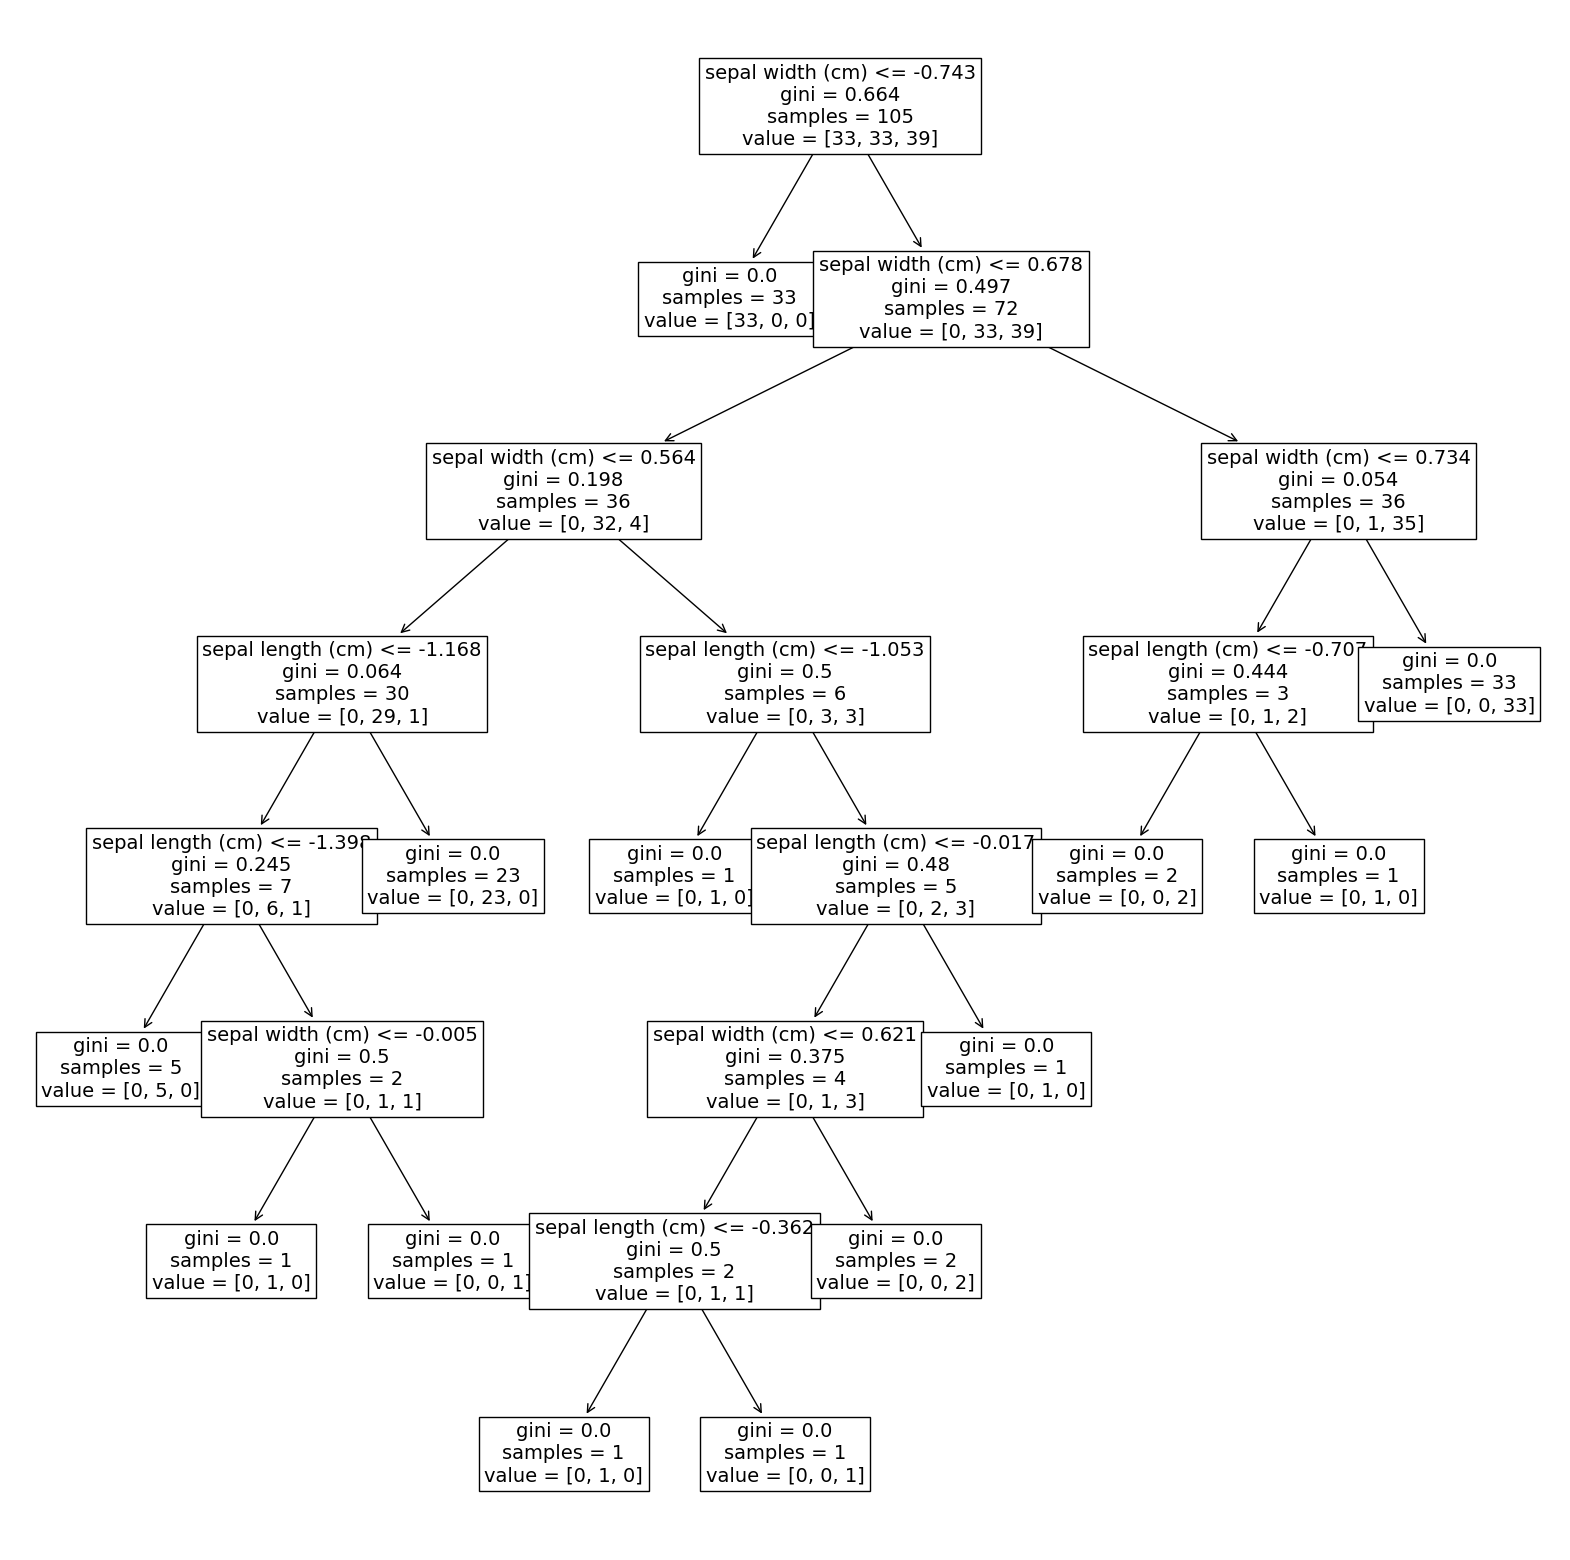

In [ ]:
# Plot Decision Tree
plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=iris.feature_names, fontsize=14)

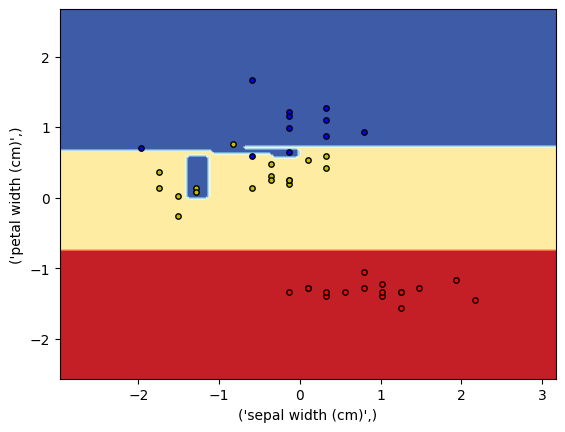

In [ ]:
# Plotting the decision boundary
ax=plt.subplot(1,1,1)
xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],
plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

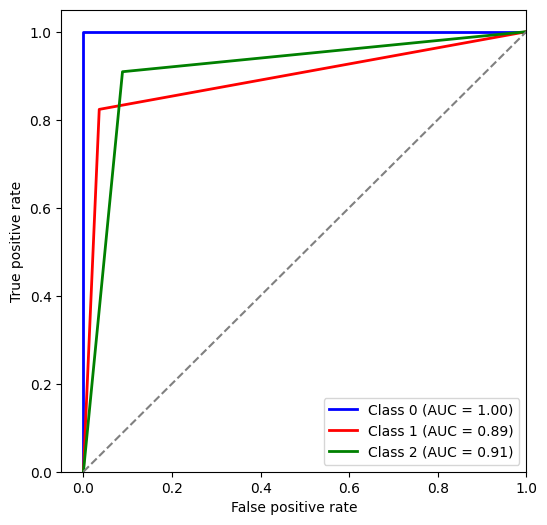

Class 0 AUC: 1.00
Class 1 AUC: 0.89
Class 2 AUC: 0.91


In [ ]:
# ROC AUC analysis Peformance analysis
plot_roc(Y_test, Y_pred, 3)

The accuarcy, precision, and recall by Decision Tree Method is  :0.9111111111111111,0.9108734402852049, and 0.9008547008547009


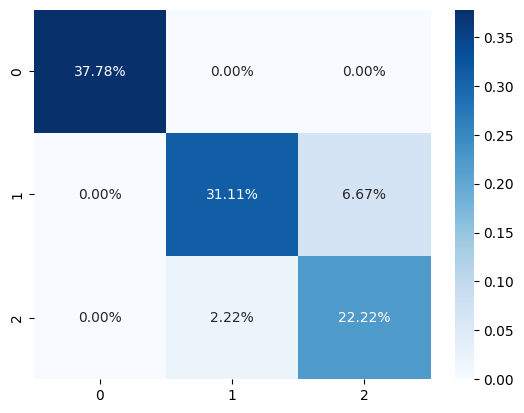

In [ ]:
# Confusion matrix and Accuracy
perf_metric(Y_test, Y_pred, 'Decision Tree')

**Random Forest**

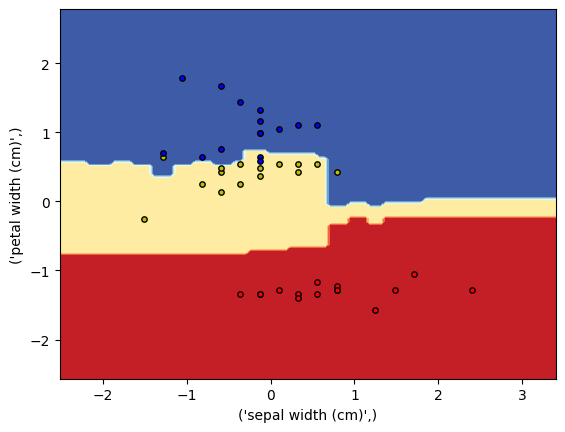

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Instantiating the model
model = RandomForestClassifier()

# Training the model
model.fit(X_train, Y_train)

# Testing the model
Y_pred= model.predict(X_test)

[Text(0.5340909090909091, 0.9444444444444444, 'sepal width (cm) <= -0.601\ngini = 0.662\nsamples = 63\nvalue = [35, 30, 40]'),
 Text(0.48863636363636365, 0.8333333333333334, 'gini = 0.0\nsamples = 22\nvalue = [35, 0, 0]'),
 Text(0.5795454545454546, 0.8333333333333334, 'sepal length (cm) <= -0.247\ngini = 0.49\nsamples = 41\nvalue = [0, 30, 40]'),
 Text(0.29545454545454547, 0.7222222222222222, 'sepal length (cm) <= -0.477\ngini = 0.482\nsamples = 23\nvalue = [0, 22, 15]'),
 Text(0.25, 0.6111111111111112, 'sepal length (cm) <= -1.398\ngini = 0.498\nsamples = 19\nvalue = [0, 17, 15]'),
 Text(0.09090909090909091, 0.5, 'sepal width (cm) <= 0.422\ngini = 0.245\nsamples = 5\nvalue = [0, 6, 1]'),
 Text(0.045454545454545456, 0.3888888888888889, 'gini = 0.0\nsamples = 4\nvalue = [0, 6, 0]'),
 Text(0.13636363636363635, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4090909090909091, 0.5, 'sepal width (cm) <= 0.621\ngini = 0.493\nsamples = 14\nvalue = [0, 11, 14]'),
 Te

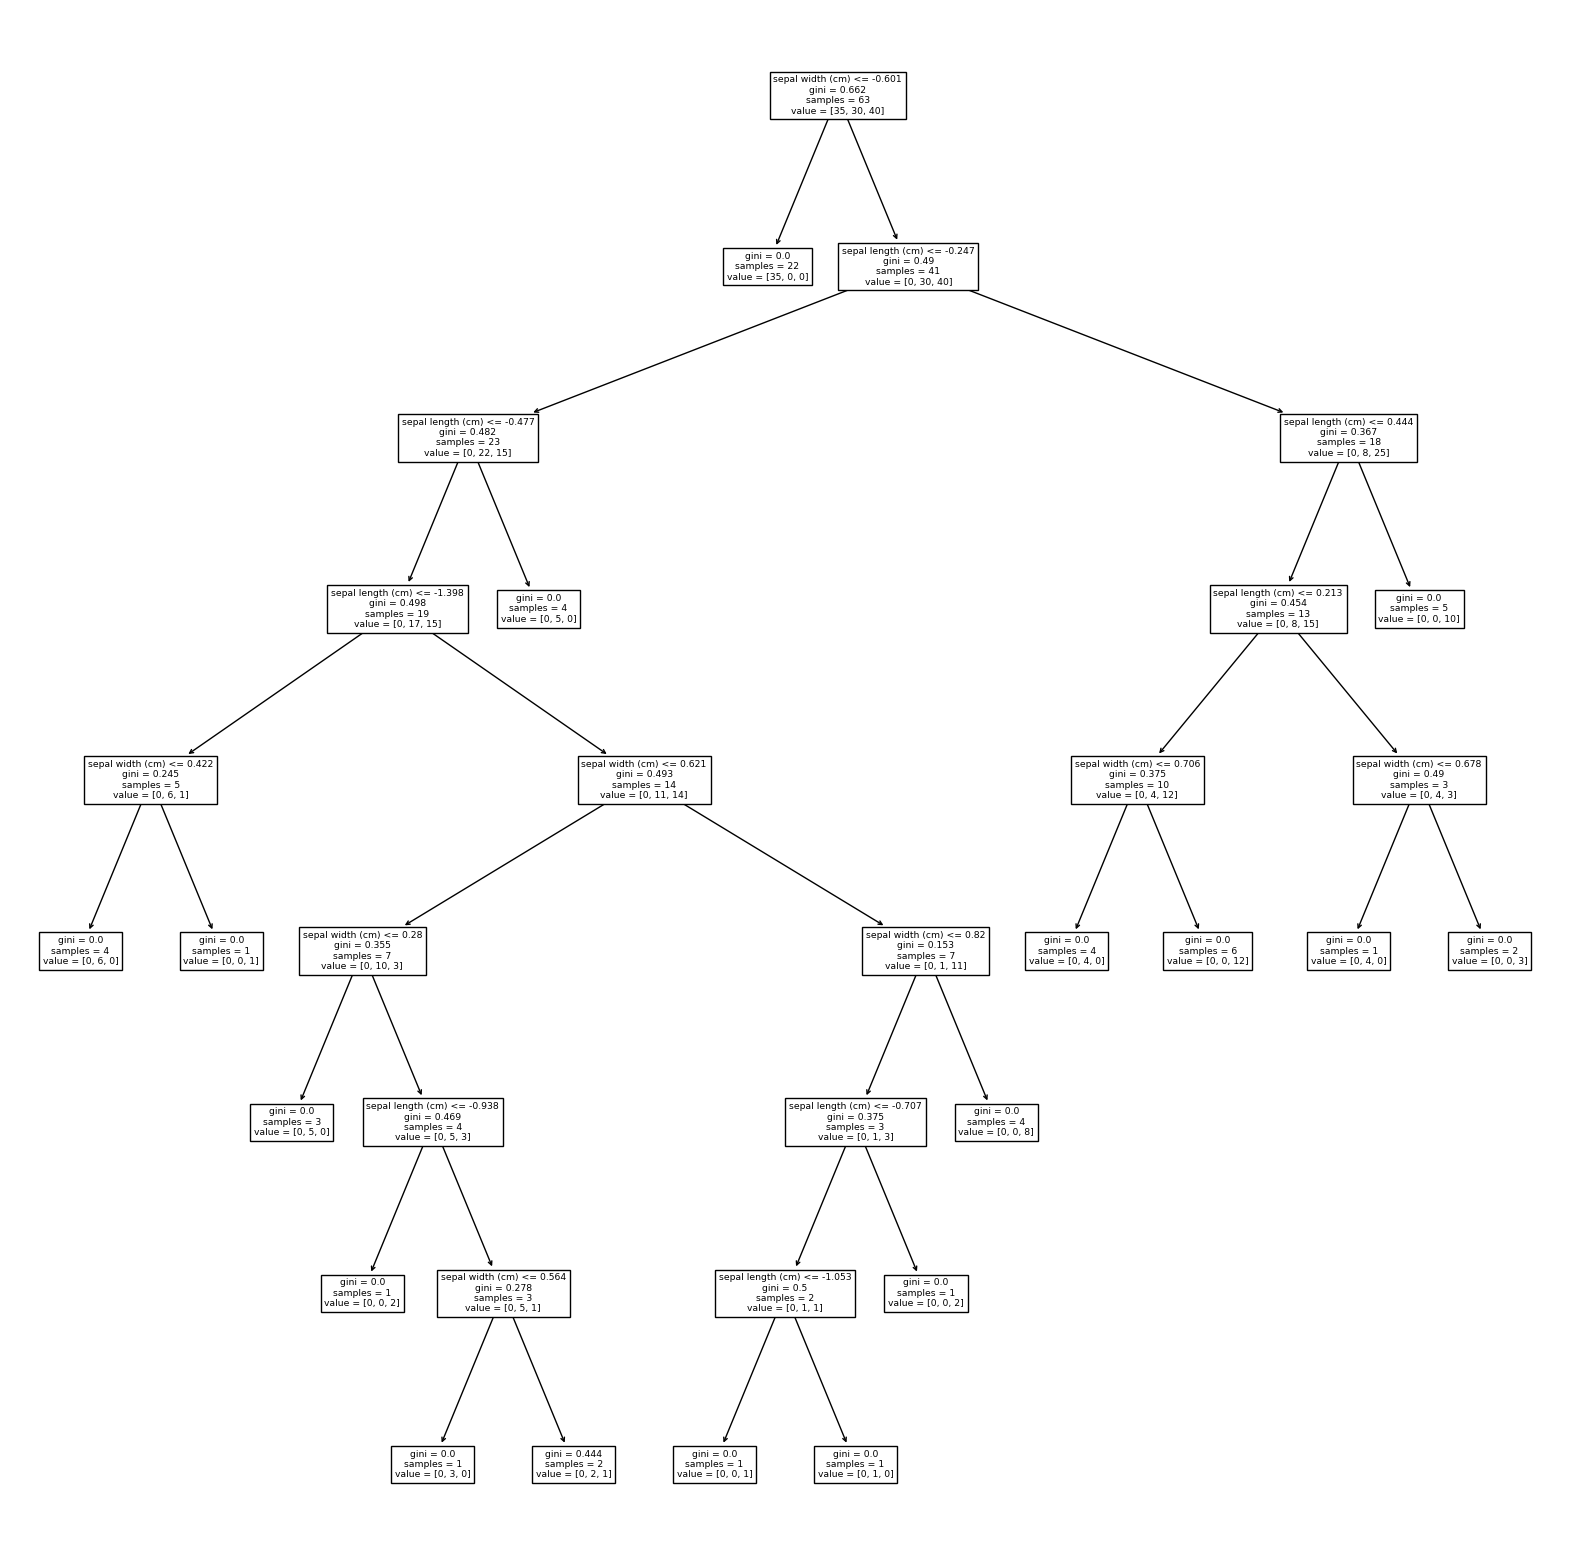

In [ ]:
# Tree plotting
plt.figure(figsize=(20,20))
tree.plot_tree(model.estimators_[0], feature_names=iris.feature_names)

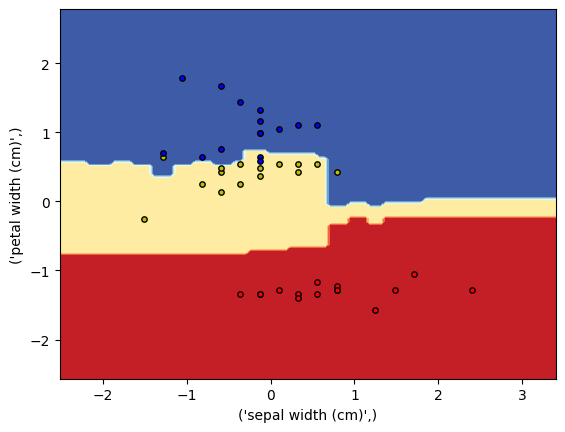

In [ ]:
# Plot Decision Boundary
ax=plt.subplot(1,1,1)
xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],
plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

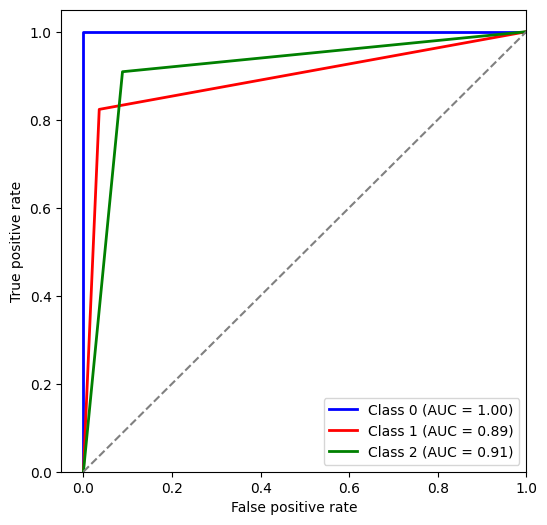

Class 0 AUC: 1.00
Class 1 AUC: 0.89
Class 2 AUC: 0.91


In [ ]:
#ROC curve
plot_roc(Y_test, Y_pred, 3)

The accuarcy, precision, and recall by Random Forest Method is  :0.9111111111111111,0.9108734402852049, and 0.9008547008547009


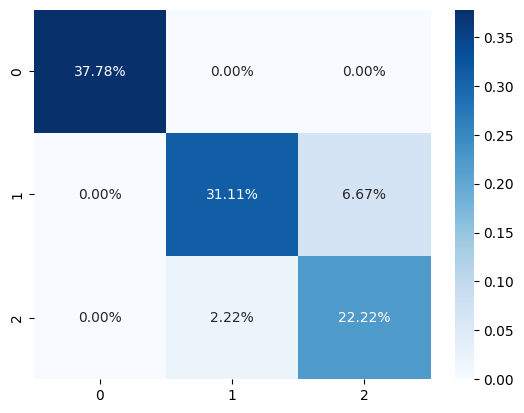

In [ ]:
# Confusion matrix and Accuracy
perf_metric(Y_test, Y_pred, 'Random Forest')

**k-Nearest Neigbour**

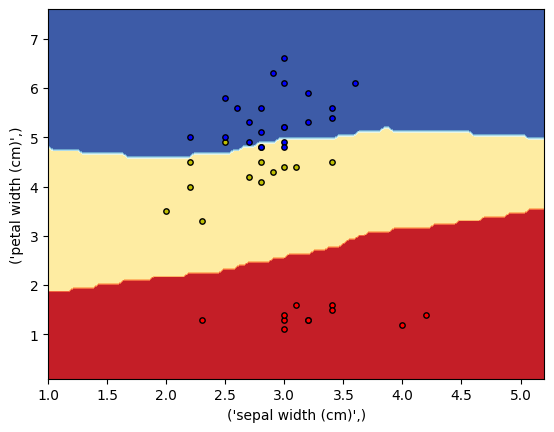

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Instantiating the model
model=KNeighborsClassifier(3)

# Training the model
model.fit(X_train, Y_train)

# Testing the model
Y_pred= model.predict(X_test)

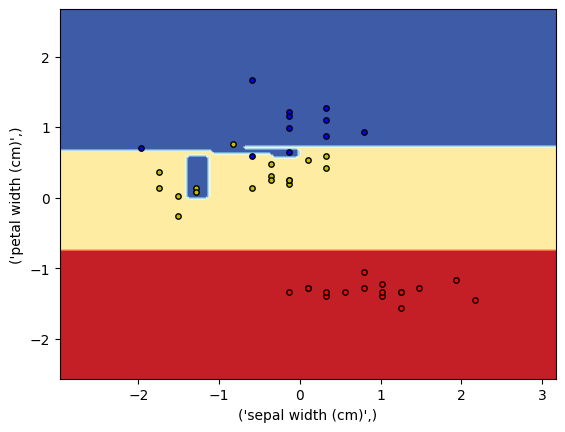

In [ ]:
# Plot Decision Boundary
ax=plt.subplot(1,1,1)
xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],
plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

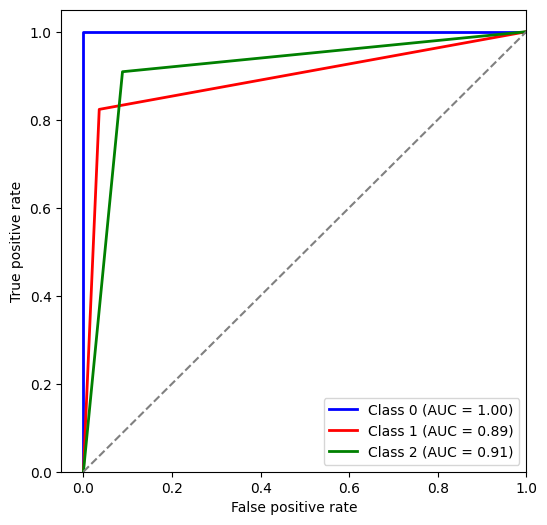

Class 0 AUC: 1.00
Class 1 AUC: 0.89
Class 2 AUC: 0.91


In [ ]:
#ROC curve
plot_roc(Y_test, Y_pred, 3)

The accuarcy, precision, and recall by Decision Tree Method is  :0.9111111111111111,0.9108734402852049, and 0.9008547008547009


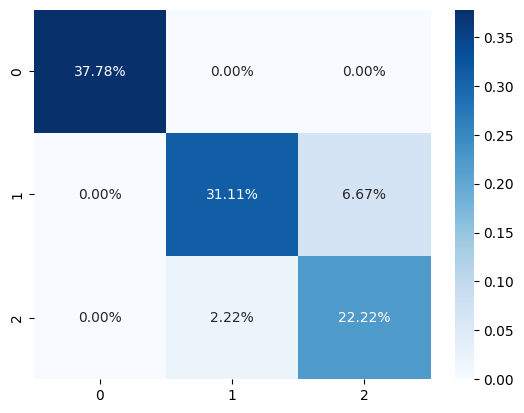

In [ ]:
# Confusion matrix and Accuracy
perf_metric(Y_test, Y_pred, 'K-Nearest Neighbour')

**Semi-supervised Learning**
SVM using linear kernel

In [ ]:
from sklearn import svm

#Instantiating the model
model=svm.SVC(kernel='rbf')  # when no kernel is specified, we are using linear SVM

# Training the model
model.fit(X_train, Y_train)

# Testing the model
Y_pred= model.predict(X_test)

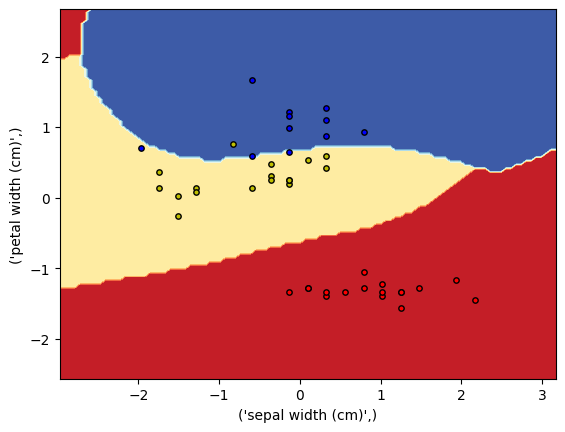

In [ ]:
# Plot Decision Boundary
ax=plt.subplot(1,1,1)
xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],
plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

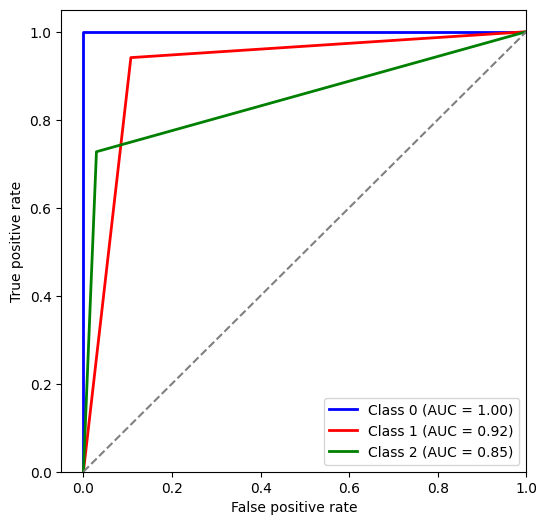

Class 0 AUC: 1.00
Class 1 AUC: 0.92
Class 2 AUC: 0.85


In [ ]:
#ROC curve
plot_roc(Y_test, Y_pred, 3)

The accuarcy, precision, and recall by Support Vector Machines Method is  :0.9111111111111111,0.8894830659536542, and 0.9103313840155945


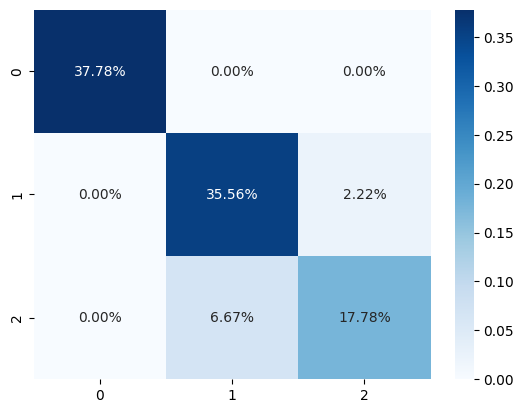

In [ ]:
# Confusion matrix and Accuracy
perf_metric(Y_test, Y_pred, 'Support Vector Machines')

**Unsupervised Learning**
k-means clustering

In [ ]:
from sklearn.cluster import KMeans

#Instantiating the model
model=KMeans(3)

# Training the model
model.fit(X_train, Y_train)

# Testing the model
Y_pred= model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


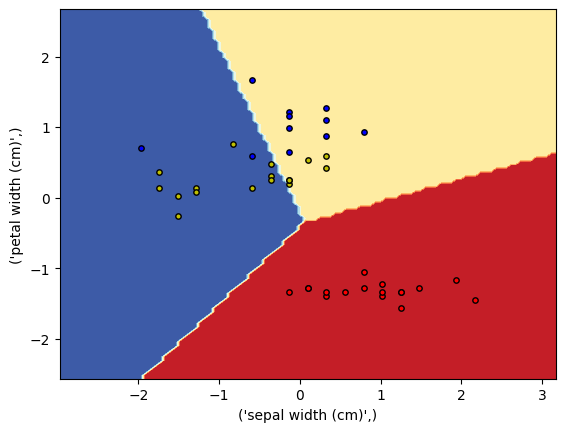

In [ ]:
# Plot Decision Boundary
ax=plt.subplot(1,1,1)
xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],
plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

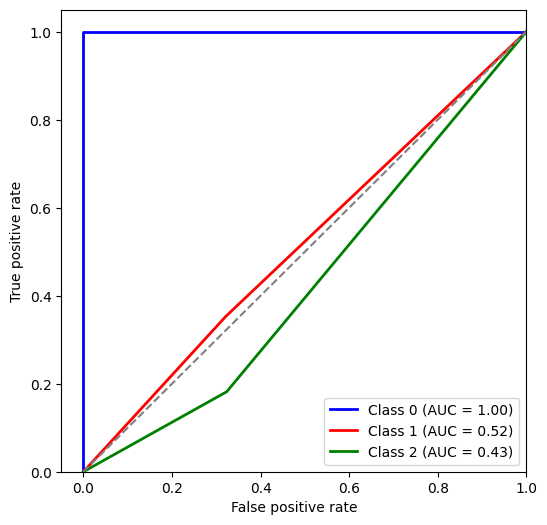

Class 0 AUC: 1.00
Class 1 AUC: 0.52
Class 2 AUC: 0.43


In [ ]:
#ROC curve
plot_roc(Y_test, Y_pred, 3)

The accuarcy, precision, and recall by Support Vector Machines Method is  :0.5555555555555556,0.5115864527629234, and 0.5179487179487179


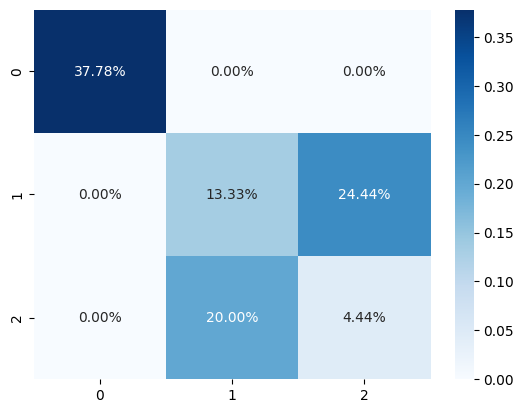

In [ ]:
# Confusion matrix and Accuracy
perf_metric(Y_test, Y_pred, 'k-means clustering')

**Artificial Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier

#Instantiating the model
model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5))

# Training the model
model.fit(X_train, Y_train)

# Testing the model
Y_pred= model.predict(X_test)

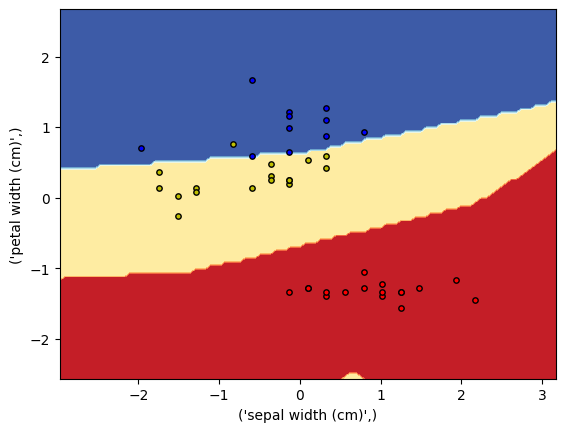

In [ ]:
# Plot Decision Boundary
ax=plt.subplot(1,1,1)
xlabel=iris.feature_names[pair[0]],
ylabel=iris.feature_names[pair[1]],
plot_decision_boundary(model, X_test, Y_test, ax,xlabel, ylabel, 3, iris.target_names, plot_colors)

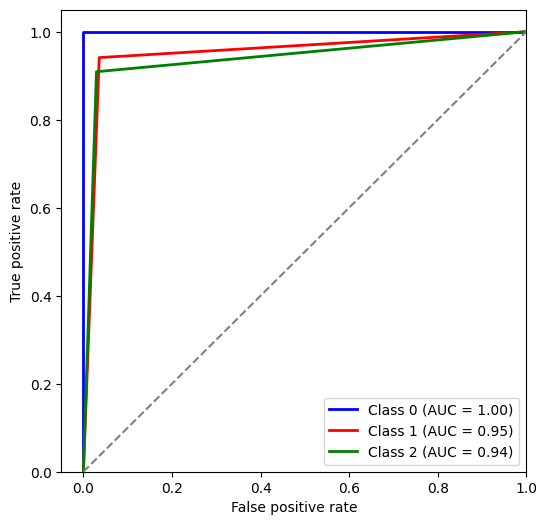

Class 0 AUC: 1.00
Class 1 AUC: 0.95
Class 2 AUC: 0.94


In [ ]:
#ROC curve
plot_roc(Y_test, Y_pred, 3)

The accuarcy, precision, and recall by Artificial Neural Network Method is  :0.9555555555555556,0.9500891265597148, and 0.9500891265597148


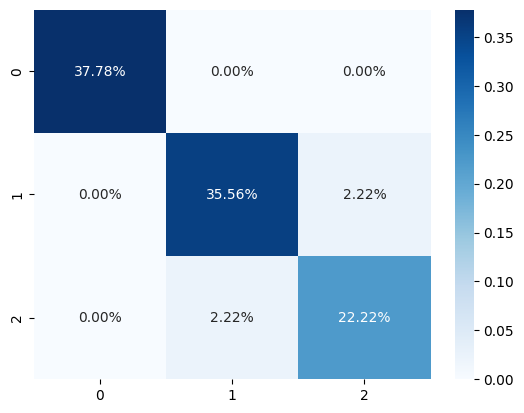

In [ ]:
# Confusion matrix and Accuracy
perf_metric(Y_test, Y_pred, 'Artificial Neural Network')

**Regression Task**

For regression Task, we will use R-squared **(Coefficient of Determination)**, and **diabetes dataset** for prediction.



**Linear Regression**

In [61]:
from sklearn.datasets import load_diabetes
# Load data
diabetes=load_diabetes()
X = diabetes.data[:,2:4] # features
y = diabetes.target # targets

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, Y_train, Y_test=train_test_split(X,y, test_size=0.3)


In [51]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error # Performance metric for regression

#Instantiating the model
model=MLPRegressor(solver='adam', hidden_layer_sizes=(100))

# Training the model
model.fit(X_train, Y_train)

# Testing the model
Y_pred= model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
# Performance metrics
r2=r2_score(Y_test, Y_pred)
rmse= np.sqrt(mean_squared_error(Y_test, Y_pred))
print(r"The R2 value and RMSE for ANN is: {}, and {}".format(r2, rmse))

The R2 value and RMSE for ANN is: -2.355102294302447, and 140.0742179715172


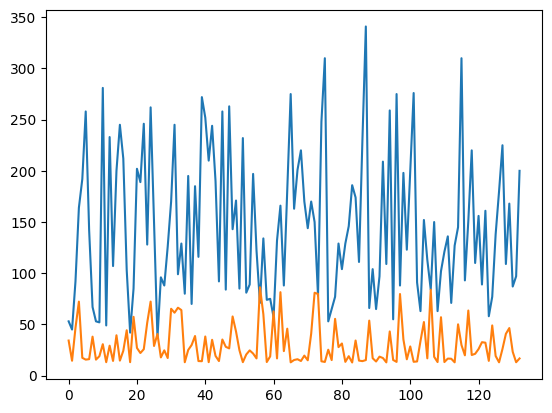

In [67]:
#Plotting Predictions
plt.plot(Y_test)
plt.plot(Y_pred)